Email spam classification - NLTK

In [11]:

import pandas as pd # pandas for read the file
email=pd.read_excel("email.xlsx" ,
                    names =["label","emails"])# read file with column names
email.head()


,label,emails
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [13]:
email.shape

(5571, 2)

In [14]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5571 non-null   object
 1   emails  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


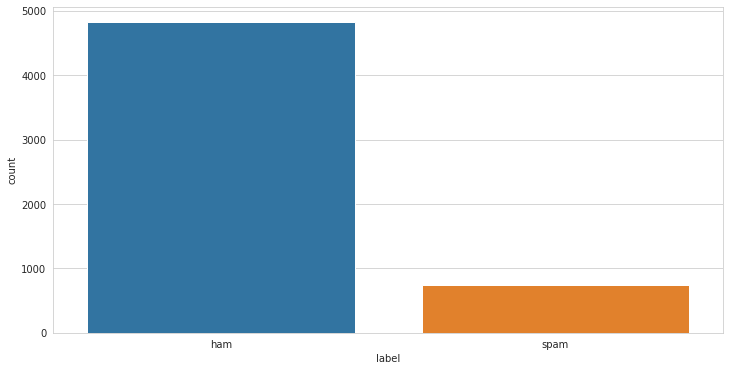

In [16]:
# Barplot describes the count of the target labels, wheather it has spam or ham
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))
sns.countplot(data = email, x = 'label');

In [22]:
# Display top 6 emails for sample

for i in email.iterrows():
    print("Class Label: {}\nEMails: \n{}\n\n".format(i[1][0], i[1][1]))
    if i[0] == 4: break

Class Label: ham
EMails: 
Ok lar... Joking wif u oni...


Class Label: spam
EMails: 
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


Class Label: ham
EMails: 
U dun say so early hor... U c already then say...


Class Label: ham
EMails: 
Nah I don't think he goes to usf, he lives around here though


Class Label: spam
EMails: 
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv




In [21]:
# Data cleaning and pre- processing

import re # regular expression
import nltk # nltk for Natural language processing (NLP)
nltk.download("stopwords") # download stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
from nltk.corpus import stopwords # import stopwords from corpus
from nltk.stem.porter import PorterStemmer # stemmer

email['emails']=email['emails'].apply(str) # convert into str


stemmer=PorterStemmer() # object for stemmer

para=[] # list for append
for i in range(0 , len(email)): # for loop iterate over the dataset
  clean=re.sub('[^a-zA-Z]', ' ', email['emails'][i]) # find not alphapet letter and if any replace with white space
  clean = clean.lower() # convert into lower case
  clean = clean.split() # split sentence into word
  clean = [stemmer.stem(word) for word in clean if not word in stopwords.words('english')] # remove stopwords 
  clean = ' '.join(clean) # again join the sendence
  para.append(clean) # append in para list



In [34]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000) # 5000 words is limit which occur more ofen
X = cv.fit_transform(para).toarray()

In [36]:

y=pd.get_dummies(email['label'])
y=y.iloc[:,1].values

In [38]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
y

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [41]:
# train , test, split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [44]:
# naive bayse model
from sklearn.naive_bayes import MultinomialNB
spam_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [52]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy score of NB model :",acc)

Accuracy score of NB model : 0.9791816223977028


In [62]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1189
           1       0.91      0.95      0.93       204

    accuracy                           0.98      1393
   macro avg       0.95      0.97      0.96      1393
weighted avg       0.98      0.98      0.98      1393



Text(0.5, 33.0, 'Predicted label')

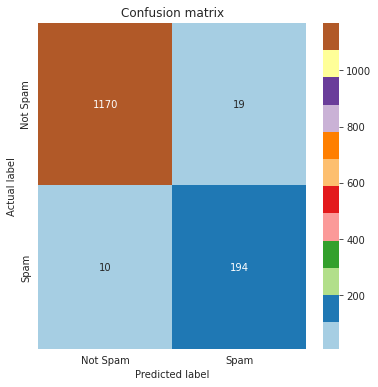

In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Paired" ,fmt='d',xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')